In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D 
import tensorflow as tf

# LENET

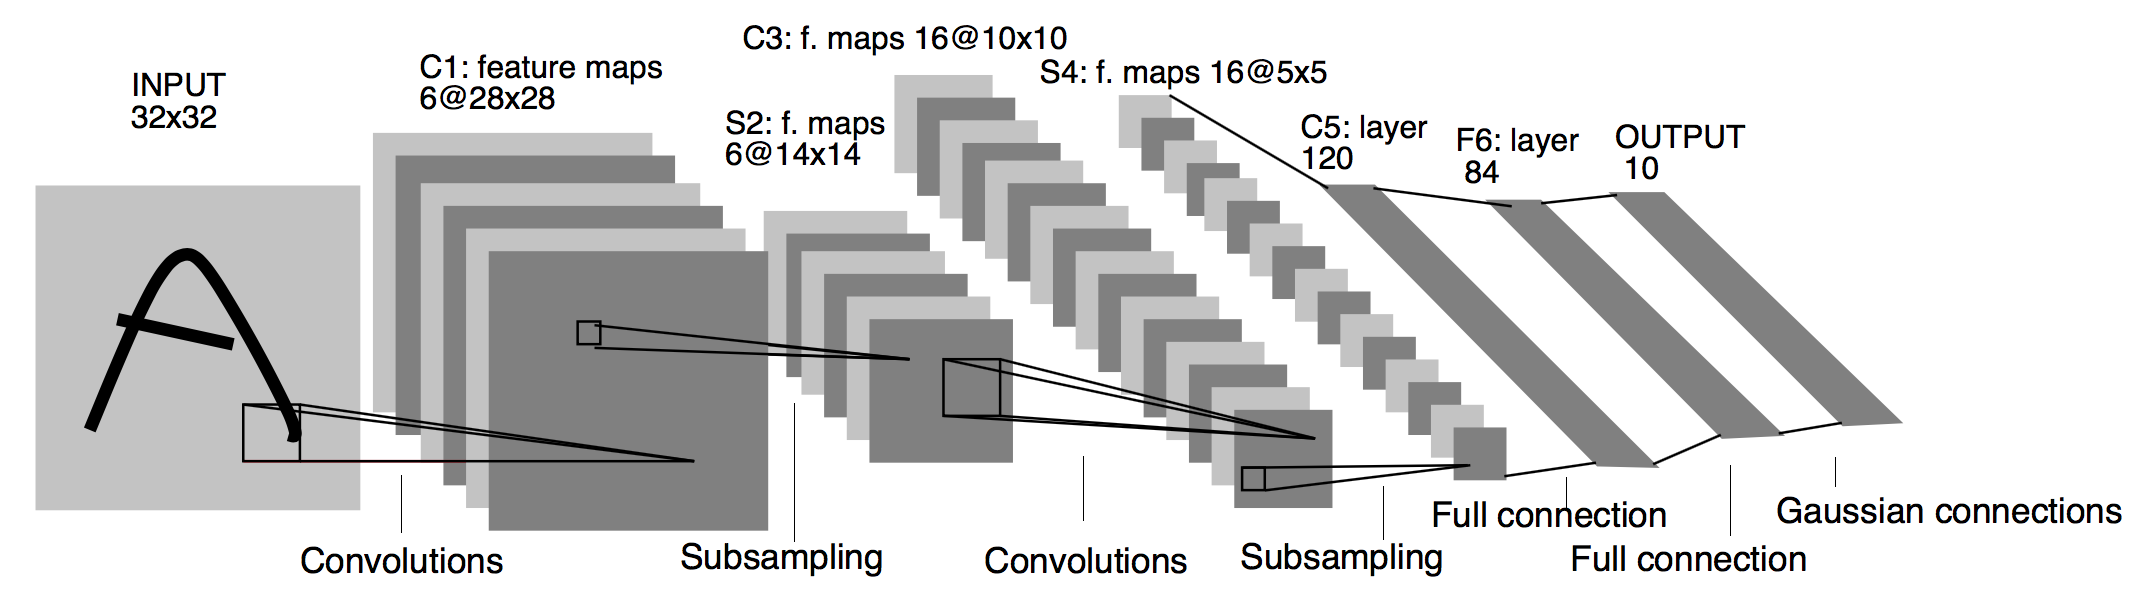

In [5]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5),name="conv1",activation="relu",input_shape=(32,32,1)),  
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2),
  tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5),name="conv2",activation="relu") , 
  tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=2) ,
  tf.keras.layers.Flatten(),
  
  
  tf.keras.layers.Dense(120,name="dense1",activation="relu"),
  tf.keras.layers.Dense(84,name="dense2",activation="relu"),
  tf.keras.layers.Dense(10,name="dense3",activation="softmax"),

  
  
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense1 (Dense)               (None, 120)               48120     
_________________________________________________________________
dense2 (Dense)               (None, 84)                1

# ALEXNET

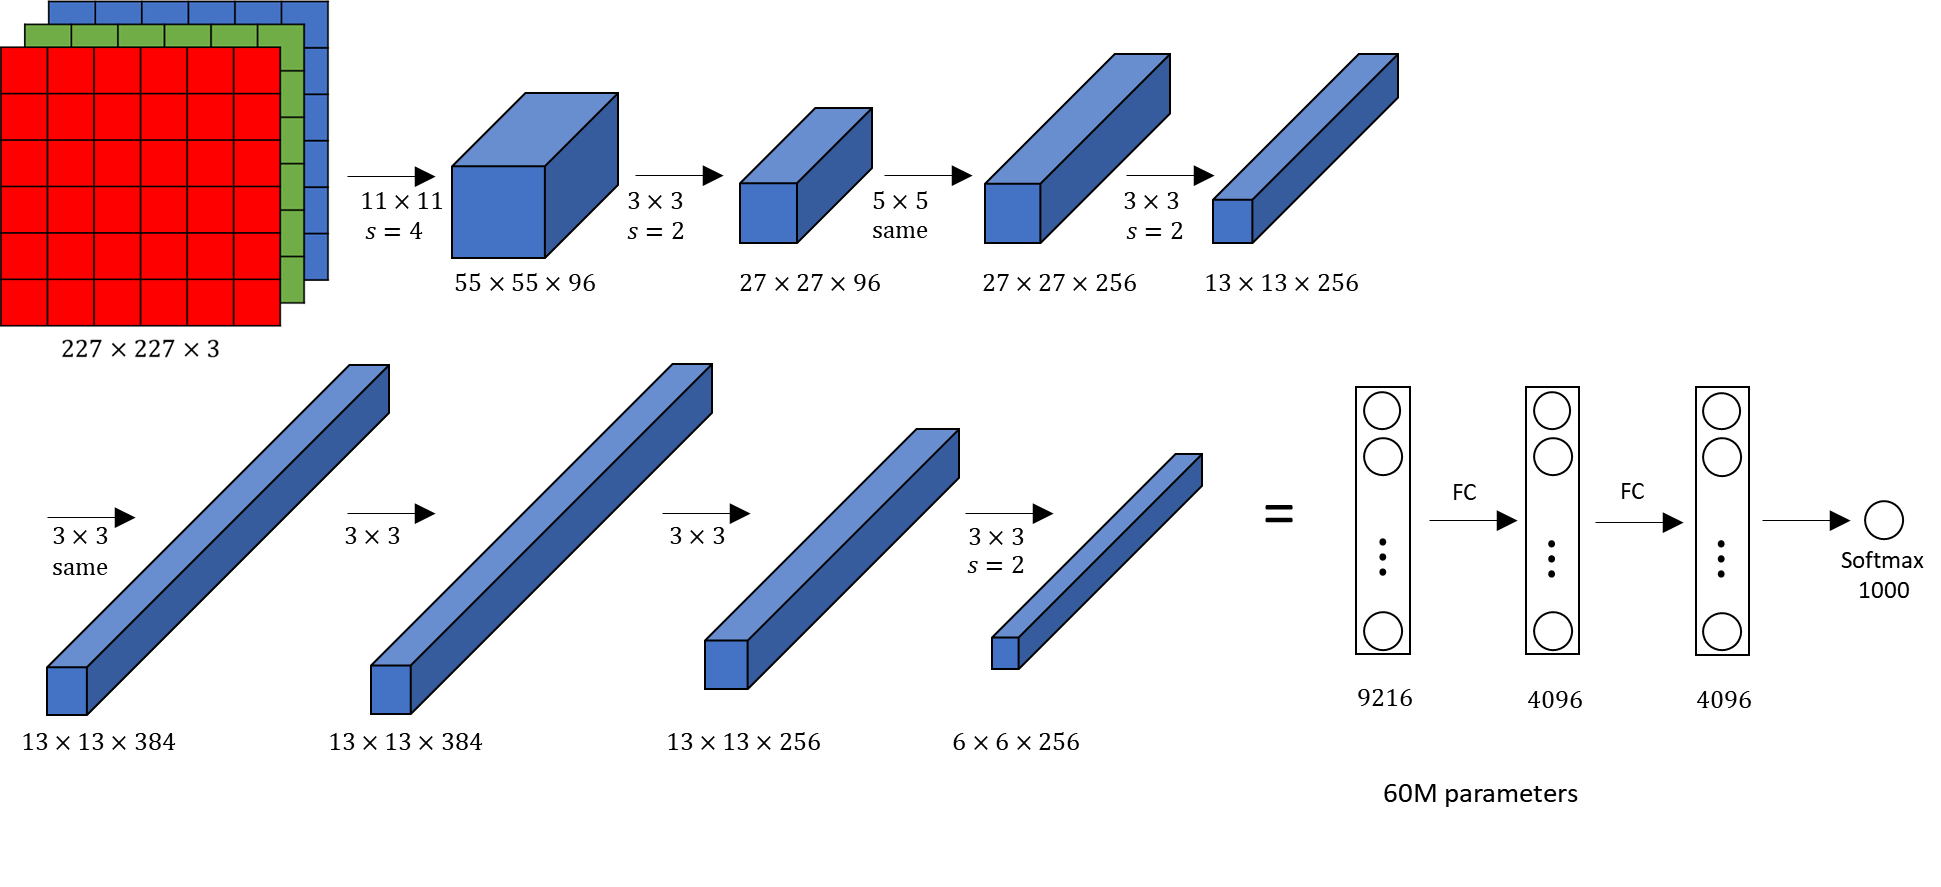

In [7]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(filters=96, kernel_size=(11,11),name="conv1",activation="relu",strides=4,input_shape=(227,227,3)),  
  tf.keras.layers.MaxPooling2D(pool_size=(3, 3),strides=2),
  tf.keras.layers.Conv2D(filters=256, kernel_size=(5,5),name="conv2",activation="relu",padding="same") , 
  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2) ,
  tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),name="conv3",activation="relu",padding="same") , 
  tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3),name="conv4",activation="relu",padding="same") , 
  tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3),name="conv5",activation="relu",padding="same") , 
  tf.keras.layers.MaxPooling2D(pool_size=(3,3),strides=2),  

  
  tf.keras.layers.Flatten(),
  
  
  
  tf.keras.layers.Dense(4096,name="dense1",activation="relu"),
  tf.keras.layers.Dense(4096,name="dense2",activation="relu"),
  tf.keras.layers.Dense(1000,name="output",activation="softmax")  

  
  
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv3 (Conv2D)               (None, 13, 13, 384)       885120    
_________________________________________________________________
conv4 (Conv2D)               (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv5 (Conv2D)               (None, 13, 13, 256)      

In [10]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten,\
# Conv2D, MaxPooling2D
# from keras.layers.normalization import BatchNormalization

model = tf.keras.models.Sequential()
# 1st Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11),\
strides=(4,4), padding='valid'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling 
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(tf.keras.layers.BatchNormalization())
# 2nd Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 3rd Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 4th Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 5th Convolutional Layer
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(tf.keras.layers.Activation('relu'))
# Pooling
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# Passing it to a dense layer
model.add(tf.keras.layers.Flatten())
# 1st Dense Layer
model.add(tf.keras.layers.Dense(4096, input_shape=(224*224*3,)))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout to prevent overfitting
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 2nd Dense Layer
model.add(tf.keras.layers.Dense(4096))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# 3rd Dense Layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation('relu'))
# Add Dropout
model.add(tf.keras.layers.Dropout(0.4))
# Batch Normalisation
model.add(tf.keras.layers.BatchNormalization())
# Output Layer
model.add(tf.keras.layers.Dense(1000))
model.add(tf.keras.layers.Activation('softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)      

# VGGNET

In [11]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg19 import preprocess_input

In [12]:
model = VGG16(weights='imagenet', include_top=True)

In [13]:
model = Model(inputs=model.input, outputs=model.outputs)

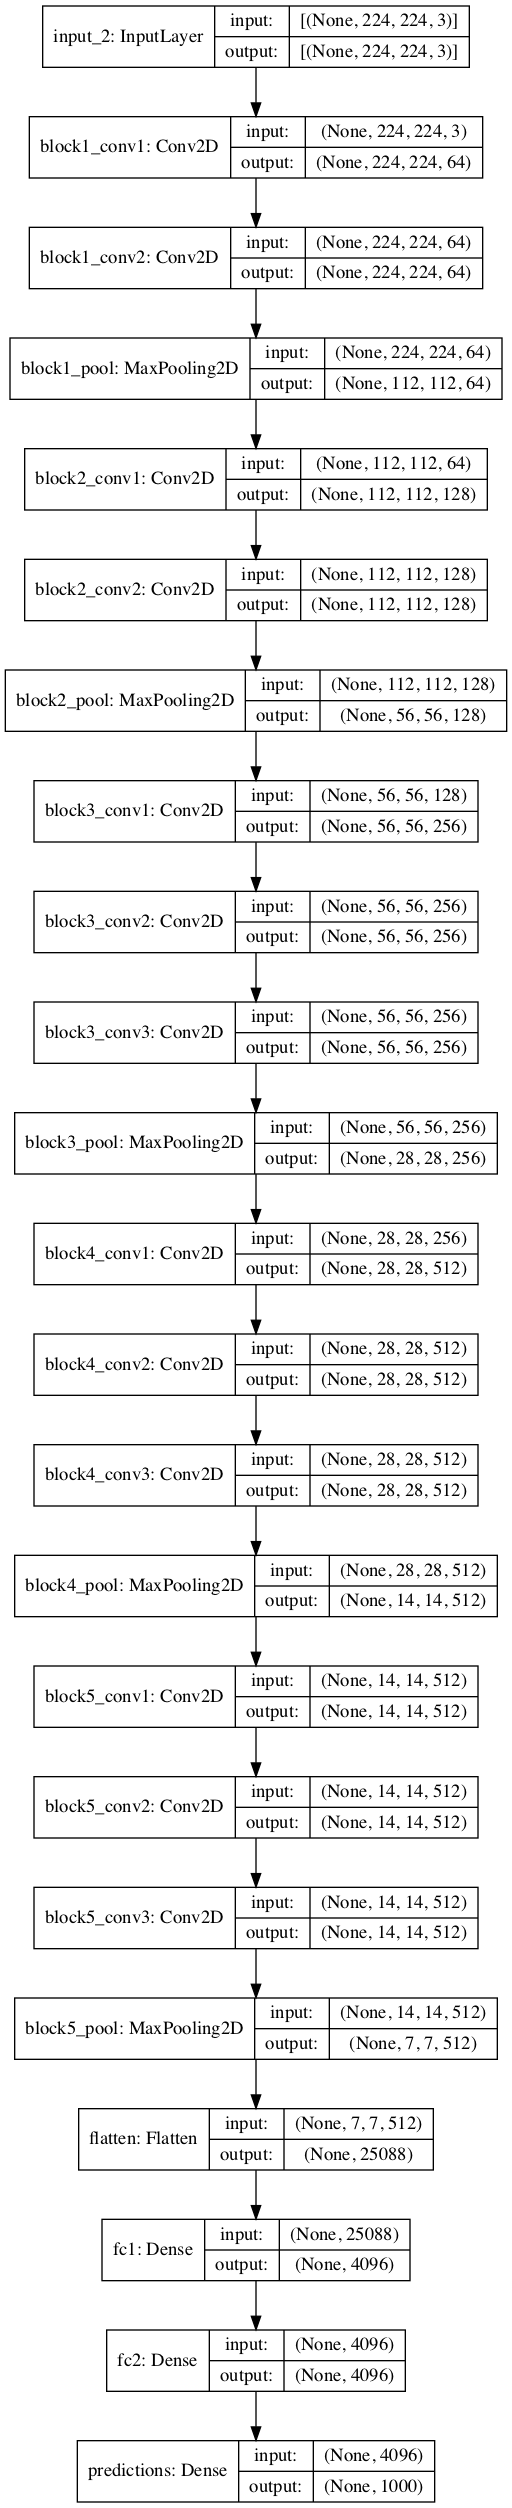

In [14]:
tf.keras.utils.plot_model(model, "VGG16.png", show_shapes=True)

In [15]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))# this should match with the model input size 
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

In [16]:

pred

array([[2.03856388e-07, 9.63145709e-12, 6.89386381e-10, 3.26729338e-10,
        2.78380596e-10, 6.38331388e-10, 1.16996457e-09, 6.67305100e-10,
        5.37280831e-10, 1.42653516e-08, 3.92246825e-12, 8.33456915e-12,
        2.92878118e-11, 5.79754404e-11, 1.64756139e-10, 2.65495848e-10,
        2.71280082e-11, 4.83089291e-10, 1.41717471e-10, 3.81961025e-11,
        1.66231029e-08, 2.32459314e-08, 6.56879529e-09, 1.00127842e-07,
        3.00226262e-08, 8.68202177e-11, 1.12317919e-10, 5.22203357e-11,
        9.22618371e-11, 9.72765132e-11, 1.52274568e-10, 3.19787361e-12,
        1.66939639e-11, 1.17811794e-09, 4.05140703e-08, 1.78545090e-08,
        4.19171649e-08, 2.19520291e-09, 7.88457702e-11, 3.57119632e-08,
        6.11520973e-11, 4.21889329e-11, 6.79110213e-10, 1.89431990e-08,
        2.52927512e-10, 1.12253887e-10, 1.51512358e-10, 3.03791603e-10,
        1.00302213e-06, 4.57132728e-07, 2.31479748e-06, 1.68643294e-06,
        9.75663925e-11, 7.32482686e-11, 1.90397142e-10, 5.564805

In [17]:
P=imagenet_utils.decode_predictions(pred)

In [18]:
P

[[('n01871265', 'tusker', 0.6133581),
  ('n02504458', 'African_elephant', 0.3716956),
  ('n02504013', 'Indian_elephant', 0.014908347),
  ('n02398521', 'hippopotamus', 1.2515624e-05),
  ('n02408429', 'water_buffalo', 1.0748288e-05)]]

# inception 

In [18]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input

In [19]:
model = InceptionV3(weights='imagenet', include_top=True)

In [20]:
model = Model(inputs=model.input, outputs=model.outputs)

In [18]:
tf.keras.utils.plot_model(model, "inception_.png", show_shapes=True)

In [21]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)

In [22]:
P=imagenet_utils.decode_predictions(pred)

In [23]:
P

[[('n01871265', 'tusker', 0.5607442),
  ('n02504458', 'African_elephant', 0.29287416),
  ('n02504013', 'Indian_elephant', 0.050633878),
  ('n03188531', 'diaper', 0.00060015835),
  ('n01695060', 'Komodo_dragon', 0.00050132244)]]

# RES NET

In [24]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions


In [25]:
model = ResNet50(weights='imagenet',include_top=True)

In [26]:
model = Model(inputs=model.input, outputs=model.outputs)

In [27]:
img_path = 'elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

pred = model.predict(x)

In [29]:
P=imagenet_utils.decode_predictions(pred)

In [30]:
P

[[('n01871265', 'tusker', 0.5750658),
  ('n02504458', 'African_elephant', 0.31014633),
  ('n02504013', 'Indian_elephant', 0.06455654),
  ('n01440764', 'tench', 0.012503117),
  ('n02009229', 'little_blue_heron', 0.0029614738)]]

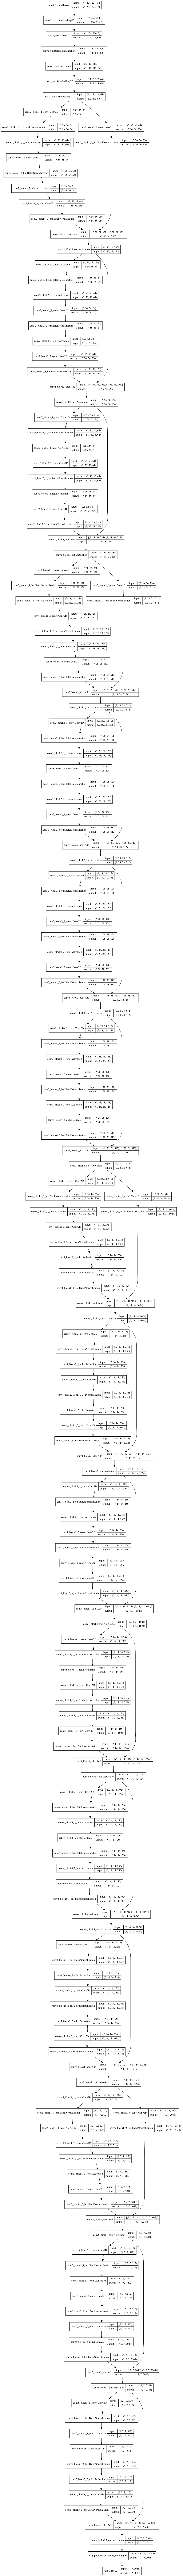

In [28]:
tf.keras.utils.plot_model(model, "renet50.png", show_shapes=True)